In [1]:
import pacmap
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pca_path = '/Users/hyhuang/Desktop/PaCMAP/Seurat/immdata.csv'
X_pca = pd.read_csv(pca_path).to_numpy()


In [5]:
X = X_pca[:, 1:].astype(np.float)

In [7]:
X.shape

(13999, 30)

In [8]:
from sklearn.manifold import TSNE

In [15]:
p = pacmap.PaCMAP()
u = umap.UMAP()
t = TSNE()

PaCMAP(n_neighbors=10, n_MN=5, n_FP=20, distance=euclidean,lr=1.0, n_iters=450, apply_pca=True, opt_method='adam', verbose=True)


In [17]:
X_p = p.fit_transform(X)
X_u = u.fit_transform(X)
X_t = t.fit_transform(X)

finding pairs!
[[ 0.18424195 -0.01725173  0.00273794 ...  0.00606614 -0.0071792
   0.00419939]
 [ 0.21454054  0.02625901  0.03090519 ...  0.03299814 -0.02096808
  -0.00465727]
 [ 0.18250299  0.00960165  0.02179408 ...  0.0070349   0.018291
  -0.00579607]
 ...
 [-0.08154246 -0.07049862 -0.01790017 ...  0.00255138 -0.01035154
  -0.01121813]
 [-0.1324043   0.02639878  0.02510023 ...  0.00076079 -0.00235182
  -0.01077151]
 [-0.15121764  0.03379518  0.02162081 ... -0.0059607   0.00365627
  -0.01944059]]
found nearest neighbor
found sig
found scaled dist
sampled pairs
Iteration:   10, Loss: 139273.562500
Iteration:   20, Loss: 110664.875000
Iteration:   30, Loss: 101799.750000
Iteration:   40, Loss: 95638.750000
Iteration:   50, Loss: 90446.468750
Iteration:   60, Loss: 85733.851562
Iteration:   70, Loss: 80457.250000
Iteration:   80, Loss: 74212.125000
Iteration:   90, Loss: 66157.734375
Iteration:  100, Loss: 53776.359375
Iteration:  110, Loss: 66040.179688
Iteration:  120, Loss: 65379.304

/Users/hyhuang/opt/anaconda3/envs/Viz/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/anaconda3/envs/Viz/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/hyhuang/opt/anaconda3/envs/Viz/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/anaconda3/en

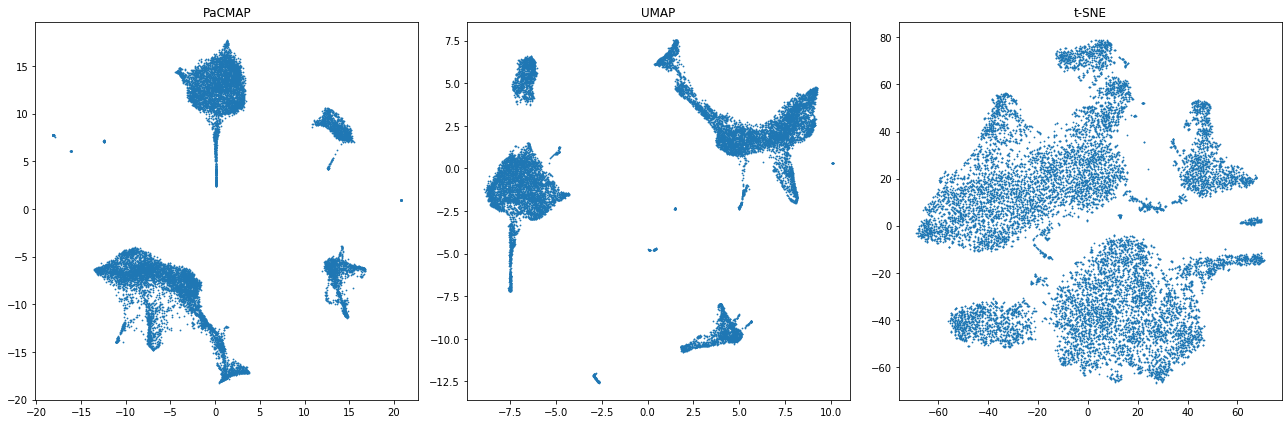

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].scatter(X_p[:, 0], X_p[:, 1], s=0.6)
axes[0].set_title('PaCMAP')
axes[1].scatter(X_u[:, 0], X_u[:, 1], s=0.6)
axes[1].set_title('UMAP')
axes[2].scatter(X_t[:, 0], X_t[:, 1], s=0.6)
axes[2].set_title('t-SNE')
plt.tight_layout()


In [22]:
def random_triplet_eval(X, X_new):
    '''
    This is a function that is used to evaluate the lower dimension embedding.
    An triplet satisfaction score is calculated by evaluating how many randomly
    selected triplets have been violated. Each point will generate 5 triplets.
    Input:
        X: A numpy array with the shape [N, p]. The higher dimension embedding
           of some dataset. Expected to have some clusters.
        X_new: A numpy array with the shape [N, k]. The lower dimension embedding
               of some dataset. Expected to have some clusters as well.
        y: A numpy array with the shape [N, 1]. The labels of the original
           dataset. Used to identify clusters
    Output:
        acc: The score generated by the algorithm.
    '''    

    # Sampling Triplets
    # Five triplet per point
    anchors = np.arange(X.shape[0])
    rng = np.random.default_rng()
    triplets = rng.choice(anchors, (X.shape[0], 5, 2))
    triplet_labels = np.zeros((X.shape[0], 5))
    anchors = anchors.reshape((-1, 1, 1))
    
    # Calculate the distances and generate labels
    b = np.broadcast(anchors, triplets)
    distances = np.empty(b.shape)
    distances.flat = [np.linalg.norm(X[u] - X[v]) for (u,v) in b]
    labels = distances[:, :, 0] < distances[: , :, 1]

    
    # Calculate distances for LD
    b = np.broadcast(anchors, triplets)
    distances_l = np.empty(b.shape)
    distances_l.flat = [np.linalg.norm(X_new[u] - X_new[v]) for (u,v) in b]
    pred_vals = distances_l[:, :, 0] < distances_l[:, :, 1]
    correct = np.sum(pred_vals == labels)
    acc = correct/X.shape[0]/5
    return acc


In [26]:
s = 0
for i in range(5):
    s += random_triplet_eval(X, X_p)
print(f'Random triplet score for PaCMAP is {s/5}')

0.7802814486749053


In [29]:
s = 0
for i in range(5):
    s += random_triplet_eval(X, X_t)
print(f'Random triplet score for t-SNE is {s/5}')

Random triplet score for t-SNE is 0.7201428673476676


In [30]:
s = 0
for i in range(5):
    s += random_triplet_eval(X, X_u)
print(f'Random triplet score for UMAP is {s/5}')

Random triplet score for UMAP is 0.7850560754339595


In [31]:
stim_path = '/Users/hyhuang/Desktop/PaCMAP/Seurat/immstim.csv'
label_path = '/Users/hyhuang/Desktop/PaCMAP/Seurat/immlabel.csv'

y_stim = pd.read_csv(stim_path).to_numpy()
y = pd.read_csv(label_path).to_numpy()

In [34]:
y = y[:, 1]

In [35]:
y_stim = y_stim[:, 1]
y_stim = (y_stim != 'CTRL')

In [36]:
y_stim

array([False, False, False, ...,  True,  True,  True])

In [37]:
y_stim = y_stim.astype(np.int)

In [38]:
y_stim

array([0, 0, 0, ..., 1, 1, 1])

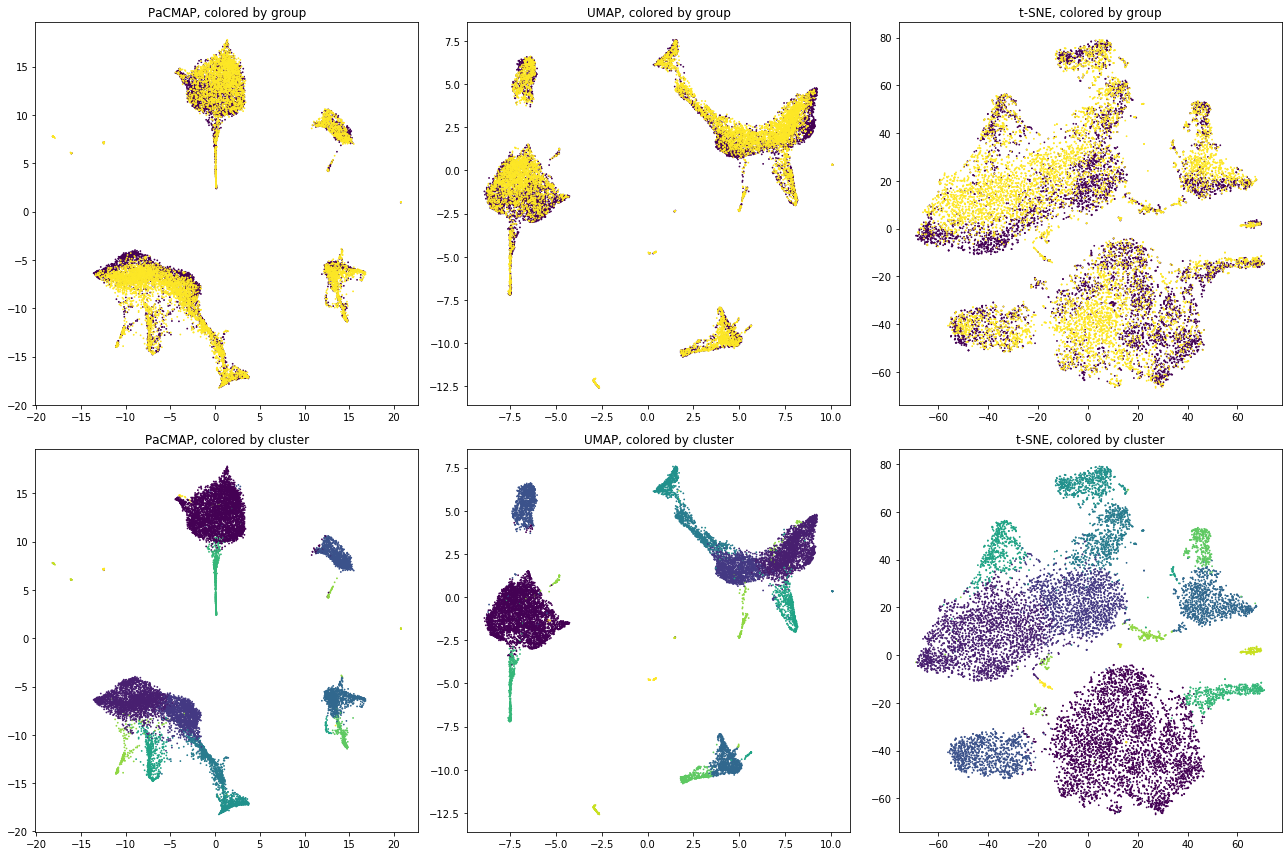

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes[0][0].scatter(X_p[:, 0], X_p[:, 1], s=0.6, c=y_stim, cmap='viridis')
axes[0][0].set_title('PaCMAP, colored by group')
axes[0][1].scatter(X_u[:, 0], X_u[:, 1], s=0.6, c=y_stim, cmap='viridis')
axes[0][1].set_title('UMAP, colored by group')
axes[0][2].scatter(X_t[:, 0], X_t[:, 1], s=0.6, c=y_stim, cmap='viridis')
axes[0][2].set_title('t-SNE, colored by group')
axes[1][0].scatter(X_p[:, 0], X_p[:, 1], s=0.6, c=y, cmap='viridis')
axes[1][0].set_title('PaCMAP, colored by cluster')
axes[1][1].scatter(X_u[:, 0], X_u[:, 1], s=0.6, c=y, cmap='viridis')
axes[1][1].set_title('UMAP, colored by cluster')
axes[1][2].scatter(X_t[:, 0], X_t[:, 1], s=0.6, c=y, cmap='viridis')
axes[1][2].set_title('t-SNE, colored by cluster')

plt.tight_layout()


This dataset comes from https://satijalab.org/seurat/v3.2/immune_alignment.html

In this experiment, PBMCs were split into a stimulated and control group and the stimulated group was treated with interferon beta. The control group is in yellow and the stimulated group is in blue.

The response to interferon caused cell type specific gene expression changes that makes a joint analysis of all the data difficult, with cells clustering both by stimulation condition and by cell type.

The clusters are found by Louvain clustering over the 10 dimensional latent space, therefore it may not always represent the authentic type of the cell.

In [2]:
pca_path = '/Users/hyhuang/Downloads/raw_counts_HIV.csv'
X_pca = pd.read_csv(pca_path).to_numpy()


In [3]:
X_pca.shape

(3994, 101)